In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rc('text', usetex=True)

# Read Noise2Seg Results

In [2]:
def get_measure(pre, exp, run=1, fraction=0.5, measure='SEG', score_type='validation_'):
    with open('/home/tibuch/Noise2Seg/experiments/{}_{}_run{}/fraction_{}/{}scores.csv'.format(pre, exp, run, fraction, score_type)) as f:
        line = f.readline()
        while line:
            line = line.strip().split(',')
            if line[0] == measure:
                return float(line[1])
            line = f.readline()
    return None

In [3]:
def read_Noise2Seg_results(pre, exp, measure='SEG', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type='validation_'):
    
    stats = []
    
    for frac in fractions:
        scores = []
        for r in runs:
            scores.append(get_measure(pre, exp, run=r, fraction=frac, measure=measure, score_type=score_type))
        
        scores = np.array(scores)
        stats.append([frac, np.mean(scores), np.std(scores)/np.sqrt(scores.shape[0])])
    
    return np.array(stats)

In [4]:
def read_Noise2Seg_bestAlpha_results(pre, exp, measure='SEG', runs=[1,2,3,4,5],
                                     fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], 
                                     alphas=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    stats = []
    best_alphas = []
    for frac in fractions:
        scores = []
        best_alphas_fraction = []
        for r in runs:
            best_score = 0
            best_alpha = 0
            for alpha in alphas:
                score = get_measure(pre + str(alpha), exp, run=r, fraction=frac, measure=measure, score_type="validation_")
                if score > best_score:
                    best_score = score
                    best_alpha = alpha
            
            # read best score from test-data with this best_alpha
            best_alphas_fraction.append(best_alpha)
            scores.append(get_measure(pre + str(best_alpha), exp, run=r, fraction=frac, measure=measure, score_type=""))
        best_alphas.append(best_alphas_fraction)    
            
        scores = np.array(scores)
        stats.append([frac, np.mean(scores), np.std(scores)/np.sqrt(scores.shape[0])])
        
    return np.array(stats), np.array(best_alphas)

# Fraction to #Images

In [5]:
def fraction_to_abs(fracs, max_num_imgs=3800):
    return np.round(max_num_imgs*fracs/100)

In [6]:
fraction_to_abs(8)

304.0

# DSB2018 n0: SEG scores on validation data

In [7]:
def load_vanillaBaseline_n0():
    stats = []
    for f in [0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0]:
        scores = []
        for r in [1,2,3,4,5]:
            scores.append(np.load('/home/tibuch/Noise2Seg/VoidSeg_Baselines/finDepth4_dsb_n0_run{}baseline/train_{}/seg_scores.dat'.format(r, f), allow_pickle=True)[1])
        
        stats.append([fraction_to_abs(f, max_num_imgs=3800), np.mean(scores), np.std(scores)/np.sqrt(5)])
                
    return np.array(stats)

In [8]:
vanilla_dsb_n0 = load_vanillaBaseline_n0()

In [9]:
alpha0_5_n0 = read_Noise2Seg_results('alpha0.5', 'dsb_n0', measure='AP', runs=[1,2,3,4,5],
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')

In [10]:
bestAlpha_n0, bestAlpha_n0_alphas = read_Noise2Seg_bestAlpha_results('alpha', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0],
                           alphas=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [11]:
baseline_dsb_n0 = read_Noise2Seg_results('fin', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')

sequential_dsb_n0 = read_Noise2Seg_results('finSeq', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')

In [12]:
plt.rc('font', family = 'serif', size = 16)

In [13]:
def cm2inch(*tupl, scale=3):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(scale * i/inch for i in tupl[0])
    else:
        return tuple(scale * i/inch for i in tupl)

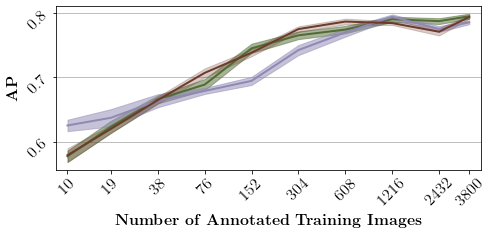

In [14]:
fig = plt.figure(figsize=cm2inch(12.2/2,3)) # 12.2cm is the text-widht of the MICCAI template
plt.rcParams['axes.axisbelow'] = True

plt.plot(fraction_to_abs(sequential_dsb_n0[:, 0], max_num_imgs = 3800), 
         sequential_dsb_n0[:, 1],
         color = '#526B34', alpha = 1, linewidth=2)
plt.fill_between(fraction_to_abs(sequential_dsb_n0[:, 0], max_num_imgs = 3800), 
                 y1 = sequential_dsb_n0[:, 1] + sequential_dsb_n0[:, 2], 
                 y2 = sequential_dsb_n0[:, 1] - sequential_dsb_n0[:, 2], 
                 color = '#526B34', alpha = 0.5, label = r'Sequential Baseline')

plt.plot(fraction_to_abs(alpha0_5_n0[:, 0], max_num_imgs = 3800), 
         alpha0_5_n0[:, 1],
         color = '#8F89B4', alpha = 1, linewidth=2)
plt.fill_between(fraction_to_abs(alpha0_5_n0[:, 0], max_num_imgs = 3800), 
                 y1 = alpha0_5_n0[:, 1] + alpha0_5_n0[:, 2], 
                 y2 = alpha0_5_n0[:, 1] - alpha0_5_n0[:, 2], 
                 color = '#8F89B4', alpha = 0.5, label = r'\textsc{DenoiSeg} ($\alpha = 0.5$)')

plt.plot(fraction_to_abs(baseline_dsb_n0[:, 0], max_num_imgs = 3800), 
         baseline_dsb_n0[:, 1],
         color = '#6D3B2B', alpha = 1, linewidth=2)
plt.fill_between(fraction_to_abs(baseline_dsb_n0[:, 0], max_num_imgs = 3800), 
                 y1 = baseline_dsb_n0[:, 1] + baseline_dsb_n0[:, 2], 
                 y2 = baseline_dsb_n0[:, 1] - baseline_dsb_n0[:, 2], 
                 color = '#6D3B2B', alpha = 0.25, label = r'Baseline ($\alpha = 0$)')

plt.semilogx()

plt.ylabel(r'\textbf{AP}')
plt.xlabel(r'\textbf{Number of Annotated Training Images}')

plt.grid(axis='y')

plt.xticks(ticks=fraction_to_abs(bestAlpha_n0[:, 0], max_num_imgs = 3800), 
           labels=fraction_to_abs(bestAlpha_n0[:, 0], max_num_imgs = 3800).astype(np.int),
           rotation=45)
plt.minorticks_off()

plt.yticks(rotation=45)

plt.xlim([8.5, 4500])

plt.tight_layout();

plt.savefig('AP_n0_area.pdf', pad_inches=0.0);
plt.savefig('AP_n0_area.svg', pad_inches=0.0);